In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

[9.64409660e+01 1.87713096e+01 5.71585329e+00 2.42263811e+00
 1.17166606e+00 5.95880609e-01 3.18680135e-01 2.02480945e-01
 1.13815836e-01 7.21596312e-02 4.12878380e-02 2.19236807e-02
 1.45736052e-02 9.32800500e-03 5.76197750e-03 3.37737785e-03
 1.89483910e-03 1.89483910e-03 9.96440150e-04 9.96440150e-04]
[9.65580160e+01 1.88934852e+01 5.82449140e+00 2.50228775e+00
 1.22820608e+00 6.36745895e-01 3.47961248e-01 2.25118805e-01
 1.29801512e-01 8.47616315e-02 5.06991482e-02 2.75778041e-02
 1.88017647e-02 1.28073903e-02 8.00674420e-03 4.88408095e-03
 2.83496280e-03 2.83496280e-03 1.53479900e-03 1.53479900e-03]


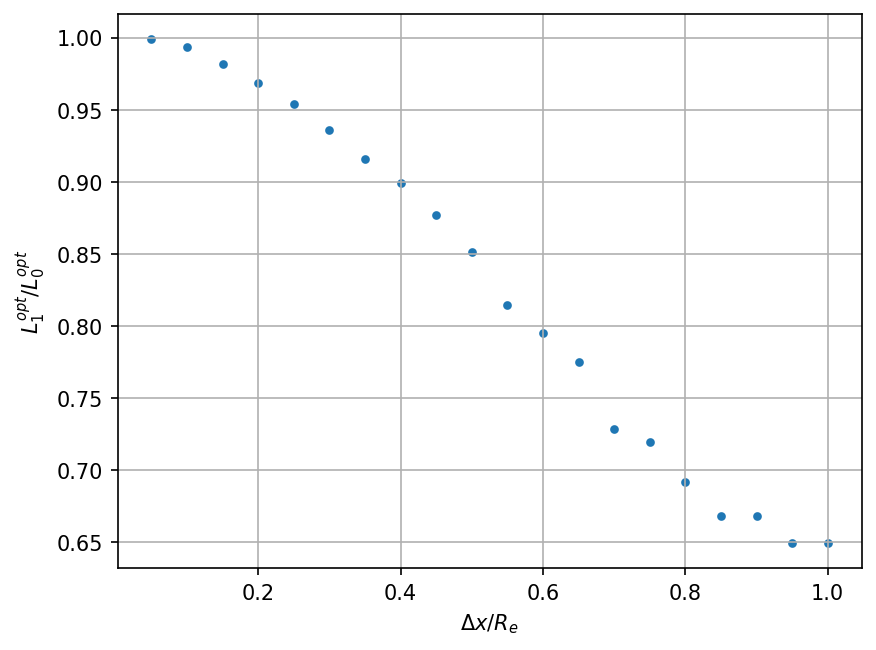

In [8]:


coordfile='no_sa/coord.h5'

with h5py.File(coordfile, 'r') as f:
    umbrella_field = np.array(f["umbrella_field"])
    lxyz=np.array(f["parameter/lxyz"])
ntarget=len(umbrella_field[umbrella_field>-1])
dx=np.loadtxt("no_sa/dx.csv")
#number of different parameters
n_param=len(dx)
opt_sa_exp=np.loadtxt(f"sa_exp/opt.csv")/ntarget
#number of simulations per parameter
n_sim=int(len(opt_sa_exp)/n_param)

opt_no_sa=np.loadtxt("no_sa/opt.csv")/ntarget
#reshape arrays
opt_sa_exp=opt_sa_exp.reshape(n_param,n_sim).mean(axis=1)
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
print(opt_sa_exp)
print(opt_no_sa)
plt.figure(dpi=150)
plt.grid()
plt.xlabel("$\Delta x/R_e$")
plt.ylabel(r"$L^{opt}_1/L^{opt}_0$")
plt.scatter(dx,opt_sa_exp/opt_no_sa,s=10)
plt.savefig("opt_hom_Nbar50.pdf")